In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline



```
Defining exponential growth equation

```



Text(0, 0.5, 'f(t)')

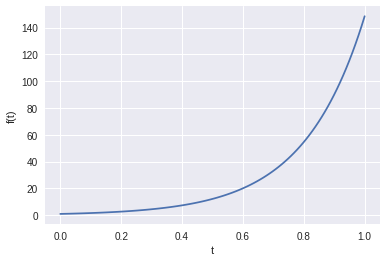

In [2]:
t=np.linspace(0,1,100)
λ=5
f= lambda t: np.exp(λ*t)
plt.plot(t,f(t))
plt.xlabel('t')
plt.ylabel('f(t)')

Defining step functions for methods and gradient function

In [0]:
def grad_fn(hk):
    return λ*hk

def euler_step_fn(dt,hk,fun):
    return hk+dt*fun(hk)

def mid_pt_step(δt,hk,fun):
    k1=fun(hk)
    k2=fun(hk+δt*k1)
    return hk + δt*(k1+k2)/2
  
def Runge_kutta_step(δt,hk,fun):
    k1=fun(hk)
    k2=fun(hk+ δt*k1/2)
    k3=fun(hk+ δt*k2/2)
    k4=fun(hk+δt*k3)
    return hk+ (1.0/6.0)*δt*(k1+2*k2+2*k3+k4)  

Defining BlackBox ODE solver

In [0]:
def odeint(func,y0,t,solver):
    δts=t[1:]-t[:-1]
    tk=t[0]
    fk=y0
    solp=[(tk,fk)]
    for δt in δts:
        fk=solver(δt,fk,func)
        tk=tk+δt
        solp.append((tk,fk))
    return solp

Solving using Euler's method,Mid point method and Runge Kutta's Fourth Order method

In [0]:
tp=np.linspace(0,1,100)
sol_euler=odeint(grad_fn,1.0,tp,euler_step_fn)
sol_midpt=odeint(grad_fn,1.0,tp,mid_pt_step)
sol_rk4=odeint(grad_fn,1.0,tp,Runge_kutta_step)

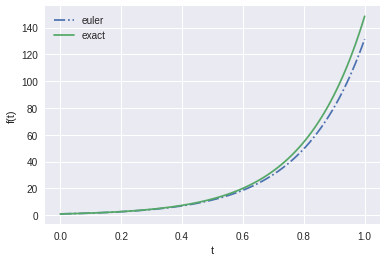

In [7]:
plt.plot(*np.array(sol_euler).T,'-.',label='euler')
#plt.plot(*np.array(sol_midpt).T,'-.',label='Mid point')
#plt.plot(*np.array(sol_rk4).T,'-.',label='RungeKutta')
plt.plot(t,f(t),label='exact')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()

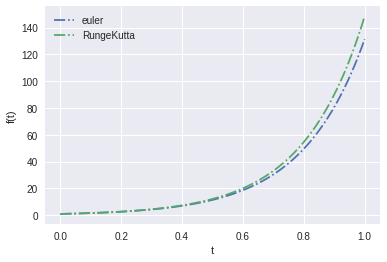

In [11]:
plt.plot(*np.array(sol_euler).T,'-.',label='euler')
#plt.plot(*np.array(sol_midpt).T,'-.',label='Mid point')
plt.plot(*np.array(sol_rk4).T,'-.',label='RungeKutta')
#plt.plot(t,f(t),label='exact')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()

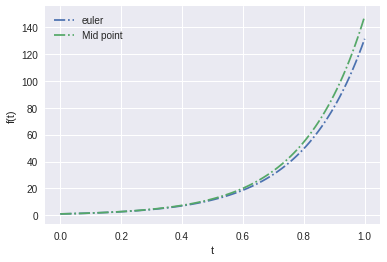

In [12]:
plt.plot(*np.array(sol_euler).T,'-.',label='euler')
plt.plot(*np.array(sol_midpt).T,'-.',label='Mid point')
#plt.plot(*np.array(sol_rk4).T,'-.',label='RungeKutta')
#plt.plot(t,f(t),label='exact')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()